<a href="https://colab.research.google.com/github/Sumaira-willis/Activity-2/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TODO: Load the dataset
import pandas as pd

df = pd.read_csv('Titanic-Dataset.csv')  # Ensure the file is in the correct directory
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# TODO: Inspect the dataset
print(df.head())
print(df.tail())
print(df.dtypes)
print(df.describe(include='all'))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
# TODO: Create categorical features
df['Pclass_cat'] = df['Pclass'].astype('category')
df['Cabin_cat'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'Unknown')
print(df['Pclass_cat'])
print(df['Cabin_cat'])

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass_cat, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]
0      Unknown
1            C
2      Unknown
3            C
4      Unknown
        ...   
886    Unknown
887          B
888    Unknown
889          C
890    Unknown
Name: Cabin_cat, Length: 891, dtype: object


In [5]:
# TODO: Handle missing Age values
df['Age'].fillna(df['Age'].median(), inplace=True)
print(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


/tmp/ipython-input-1957690707.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [6]:
# TODO: Create Family feature
df['FamilySize'] = df['SibSp'] + df['Parch']
print(df['FamilySize'])

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64


In [7]:
# TODO: Find passengers with highest fare and largest family
highest_fare = df[df['Fare'] == df['Fare'].max()]
largest_family = df[df['FamilySize'] == df['FamilySize'].max()]
print(highest_fare)
print(largest_family)

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
258  female  35.0      0      0  PC 17755  512.3292          NaN        C   
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
737    male  35.0      0      0  PC 17755  512.3292         B101        C   

    Pclass_cat Cabin_cat  FamilySize  
258          1   Unknown           0  
679          1         B           1  
737          1         B           0  
     PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  femal

In [8]:
# TODO: Create and manipulate Series
fare_series = pd.Series(df['Fare'])
fare_series_slice = fare_series[10:20]
print(fare_series)
print(fare_series_slice)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
15    16.0000
16    29.1250
17    13.0000
18    18.0000
19     7.2250
Name: Fare, dtype: float64


In [9]:
# TODO: Indexing and slicing
df_slice = df.loc[10:20, ['Name', 'Fare', 'Survived']]
print(df_slice)

                                                 Name     Fare  Survived
10                    Sandstrom, Miss. Marguerite Rut  16.7000         1
11                           Bonnell, Miss. Elizabeth  26.5500         1
12                     Saundercock, Mr. William Henry   8.0500         0
13                        Andersson, Mr. Anders Johan  31.2750         0
14               Vestrom, Miss. Hulda Amanda Adolfina   7.8542         0
15                   Hewlett, Mrs. (Mary D Kingcome)   16.0000         1
16                               Rice, Master. Eugene  29.1250         0
17                       Williams, Mr. Charles Eugene  13.0000         1
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  18.0000         0
19                            Masselmani, Mrs. Fatima   7.2250         1
20                               Fynney, Mr. Joseph J  26.0000         0


In [10]:
# TODO: Multi-index survival rates
survival_rates = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
print(survival_rates)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


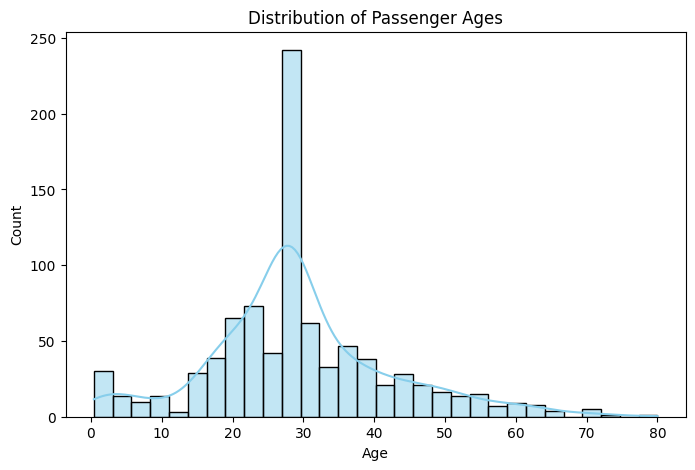

In [11]:
#Task-7
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Histogram of Ages
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-818913863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


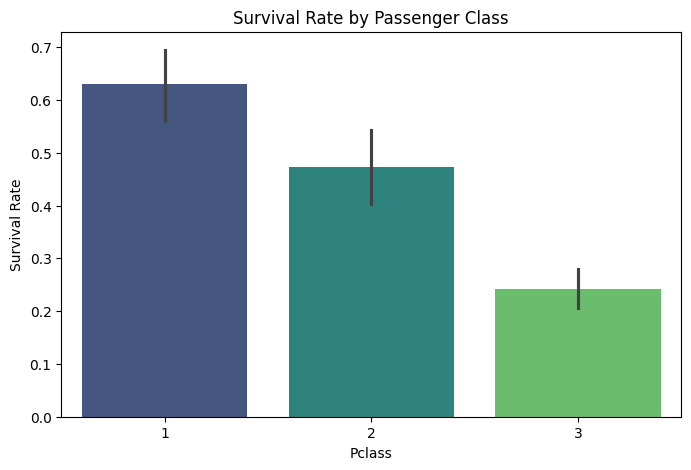

In [12]:
# TODO: Bar plot of survival by Pclass
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

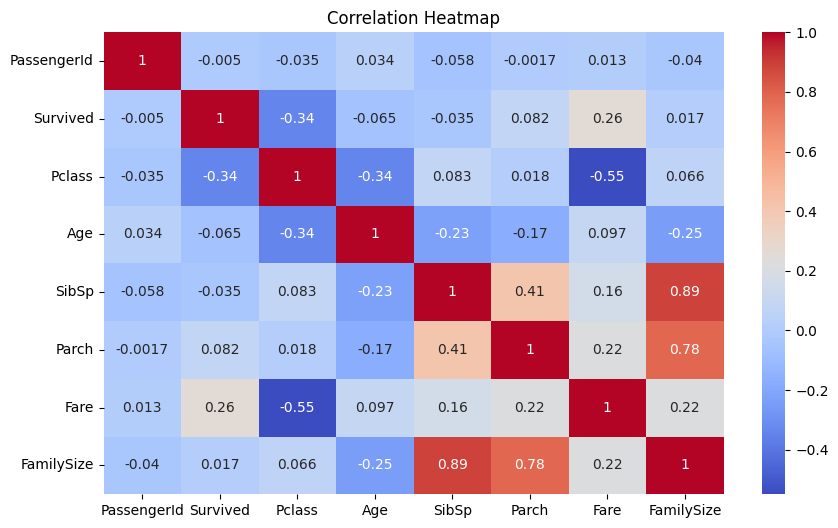

In [13]:
# TODO: Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

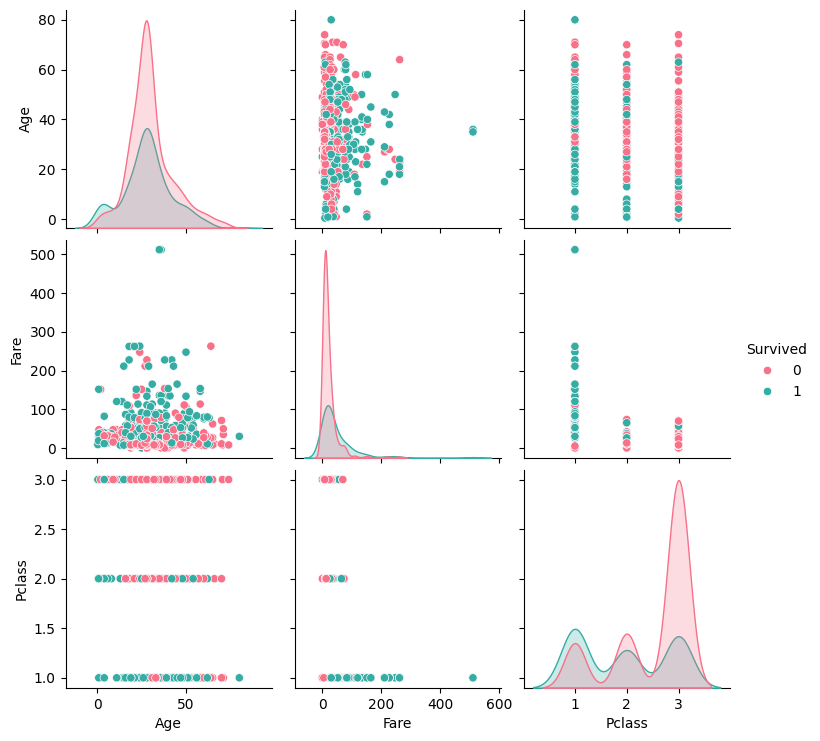

In [14]:
# TODO: Pair plot
selected_features = df[['Survived', 'Age', 'Fare', 'Pclass']]
sns.pairplot(selected_features, hue='Survived', palette='husl')
plt.show()

/tmp/ipython-input-724762394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')


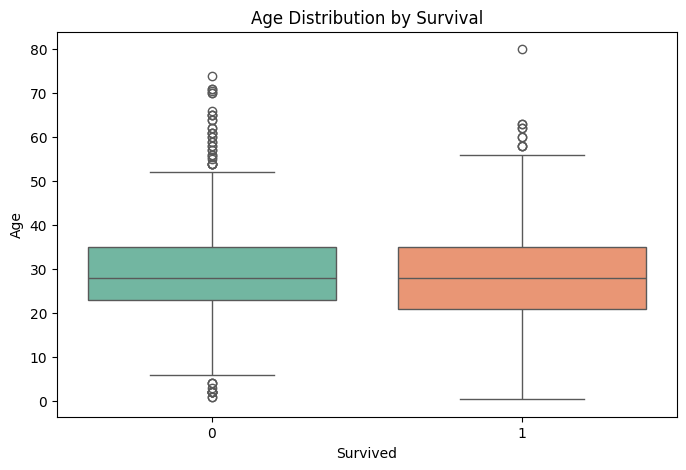

In [15]:
# TODO: Box plot of Age distribution
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival')
plt.show()

/tmp/ipython-input-480770755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Fare', data=df, palette='Set3')


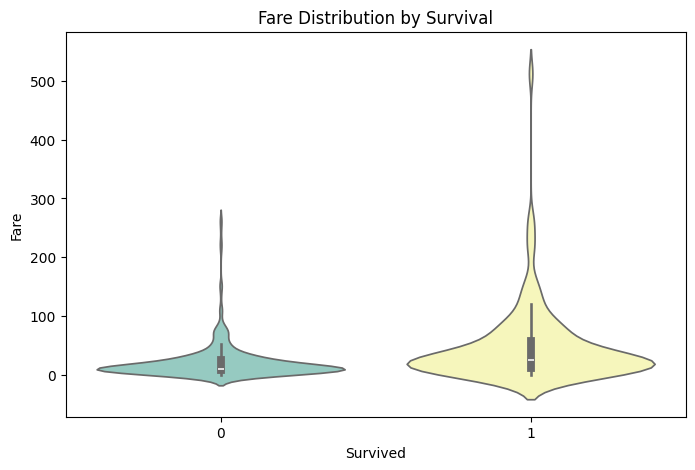

In [16]:
# TODO: Violin plot of Fare distribution
plt.figure(figsize=(8,5))
sns.violinplot(x='Survived', y='Fare', data=df, palette='Set3')
plt.title('Fare Distribution by Survival')
plt.show()